# Stock Market Prediction and Forecasting using Stacked LSTM

In [1]:
import pandas_datareader as pdr

In [2]:
# !pip install python-dotenv

In [3]:
from dotenv import load_dotenv
import os

# Load variables from .env file
load_dotenv('.env')

# Access the API key
api_key = os.getenv('API_KEY')

In [4]:
df=pdr.get_data_tiingo('AAPL',api_key=api_key)

In [5]:
import pandas as pd

In [6]:
df.to_csv('AAPL.csv')

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.sample(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
760,AAPL,2021-06-04 00:00:00+00:00,125.89,126.16,123.85,124.070,75169343,124.431076,124.697947,122.414717,122.632168,75169343,0.0,1.0
184,AAPL,2019-02-21 00:00:00+00:00,171.06,172.37,170.30,171.800,17249670,41.329641,41.646149,41.146019,41.508432,68998680,0.0,1.0
436,AAPL,2020-02-21 00:00:00+00:00,313.05,320.45,310.50,318.620,32426415,76.632132,78.443592,76.007912,77.995623,129705660,0.0,1.0
893,AAPL,2021-12-13 00:00:00+00:00,175.74,182.13,175.53,181.115,153237019,174.217854,180.552508,174.009673,179.546299,153237019,0.0,1.0
118,AAPL,2018-11-13 00:00:00+00:00,192.23,197.18,191.45,191.630,46882936,46.246395,47.437258,46.058744,46.102048,187531744,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2023-05-22 00:00:00+00:00,174.20,174.7100,173.450,173.98,43570932,174.20,174.7100,173.450,173.98,43570932,0.0,1.0
1255,AAPL,2023-05-23 00:00:00+00:00,171.56,173.3794,171.275,173.13,50747263,171.56,173.3794,171.275,173.13,50747263,0.0,1.0
1256,AAPL,2023-05-24 00:00:00+00:00,171.84,172.4183,170.520,171.09,45143488,171.84,172.4183,170.520,171.09,45143488,0.0,1.0
1257,AAPL,2023-05-25 00:00:00+00:00,172.99,173.8950,171.690,172.41,56058258,172.99,173.8950,171.690,172.41,56058258,0.0,1.0
1258,AAPL,2023-05-26 00:00:00+00:00,175.43,175.7700,173.110,173.32,54834975,175.43,175.7700,173.110,173.32,54834975,0.0,1.0


In [10]:
df1=df['close']

In [11]:
df1.shape

(1259,)

In [12]:
#plotting close price 

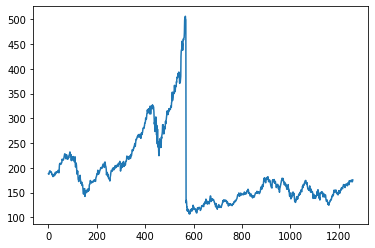

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [14]:
df1

0       187.90
1       187.50
2       186.87
3       190.24
4       191.83
         ...  
1254    174.20
1255    171.56
1256    171.84
1257    172.99
1258    175.43
Name: close, Length: 1259, dtype: float64

In [15]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-05-29 00:00:00+00:00,187.90,188.75,186.87,187.60,22514075,44.889064,45.092128,44.642999,44.817395,90056300,0.0,1.0
1,AAPL,2018-05-30 00:00:00+00:00,187.50,188.00,186.78,187.72,18690547,44.793505,44.912954,44.621498,44.846063,74762188,0.0,1.0
2,AAPL,2018-05-31 00:00:00+00:00,186.87,188.23,186.14,187.22,27482793,44.642999,44.967901,44.468603,44.726613,109931172,0.0,1.0
3,AAPL,2018-06-01 00:00:00+00:00,190.24,190.26,187.75,187.99,23442510,45.448087,45.452865,44.853230,44.910565,93770040,0.0,1.0
4,AAPL,2018-06-04 00:00:00+00:00,191.83,193.42,191.35,191.64,26266174,45.827936,46.207785,45.713265,45.782545,105064696,0.0,1.0


In [16]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2023-05-22 00:00:00+00:00,174.20,174.7100,173.450,173.98,43570932,174.20,174.7100,173.450,173.98,43570932,0.0,1.0
1255,AAPL,2023-05-23 00:00:00+00:00,171.56,173.3794,171.275,173.13,50747263,171.56,173.3794,171.275,173.13,50747263,0.0,1.0
1256,AAPL,2023-05-24 00:00:00+00:00,171.84,172.4183,170.520,171.09,45143488,171.84,172.4183,170.520,171.09,45143488,0.0,1.0
1257,AAPL,2023-05-25 00:00:00+00:00,172.99,173.8950,171.690,172.41,56058258,172.99,173.8950,171.690,172.41,56058258,0.0,1.0
1258,AAPL,2023-05-26 00:00:00+00:00,175.43,175.7700,173.110,173.32,54834975,175.43,175.7700,173.110,173.32,54834975,0.0,1.0


In [17]:
#scaling data of lstm because lstm are sensitive to scale of data

In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1.shape

(1259, 1)

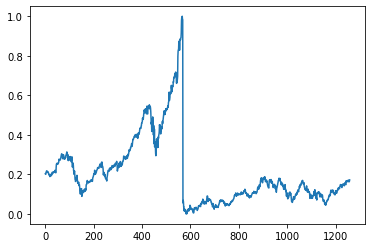

In [21]:
plt.plot(df1)
plt.show()

In [22]:
#In lstm lets say if we keep 1month data as train data 
#then rest of data becomes test data i.e 31st data get predicted
#on previous 30 days and this pattern follows for rest of data 
#also learnig happens on the data available and data predicted

In [23]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(818, 441)

In [25]:
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1): #0,1,2...,99
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0]) #100
    return np.array(dataX),np.array(dataY)

In [26]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [27]:
X_train

array([[0.20303068, 0.2020288 , 0.20045085, ..., 0.27681904, 0.28881653,
        0.28641202],
       [0.2020288 , 0.20045085, 0.20889167, ..., 0.28881653, 0.28641202,
        0.27346274],
       [0.20045085, 0.20889167, 0.21287414, ..., 0.28641202, 0.27346274,
        0.28170319],
       ...,
       [0.03271133, 0.0383469 , 0.04047589, ..., 0.10857858, 0.0989856 ,
        0.09983719],
       [0.0383469 , 0.04047589, 0.04773951, ..., 0.0989856 , 0.09983719,
        0.10356919],
       [0.04047589, 0.04773951, 0.04851597, ..., 0.09983719, 0.10356919,
        0.10737633]])

In [28]:
X_train.shape

(717, 100)

In [29]:
y_train.shape

(717,)

In [30]:
# for Lstm reshape input to be [samples, time steps, features]
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [31]:
X_train.shape

(717, 100, 1)

In [32]:
#Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 39s 290ms/step - loss: 0.0426 - val_loss: 0.0019
Epoch 2/100
12/12 [==============================] - 1s 51ms/step - loss: 0.0131 - val_loss: 0.0020
Epoch 3/100
12/12 [==============================] - 1s 51ms/step - loss: 0.0100 - val_loss: 6.7709e-04
Epoch 4/100
12/12 [==============================] - 1s 51ms/step - loss: 0.0089 - val_loss: 0.0012
Epoch 5/100
12/12 [==============================] - 1s 51ms/step - loss: 0.0082 - val_loss: 5.2109e-04
Epoch 6/100
12/12 [==============================] - 1s 52ms/step - loss: 0.0076 - val_loss: 0.0011
Epoch 7/100
12/12 [==============================] - 1s 50ms/step - loss: 0.0062 - val_loss: 8.4231e-04
Epoch 8/100
12/12 [==============================] - 1s 52ms/step - loss: 0.0058 - val_loss: 3.4254e-04
Epoch 9/100
12/12 [==============================] - 1s 54ms/step - loss: 0.0058 - val_loss: 4.8695e-04
Epoch 10/100
12/12 [==============================] - 1s 53ms/step - loss: 0.0

12/12 [==============================] - 1s 70ms/step - loss: 0.0020 - val_loss: 2.2602e-04
Epoch 80/100
12/12 [==============================] - 1s 63ms/step - loss: 0.0015 - val_loss: 2.2056e-04
Epoch 81/100
12/12 [==============================] - 1s 64ms/step - loss: 0.0013 - val_loss: 2.2615e-04
Epoch 82/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0019 - val_loss: 2.2761e-04
Epoch 83/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0042 - val_loss: 2.8892e-04
Epoch 84/100
12/12 [==============================] - 1s 75ms/step - loss: 0.0045 - val_loss: 3.4814e-04
Epoch 85/100
12/12 [==============================] - 1s 71ms/step - loss: 0.0043 - val_loss: 2.5356e-04
Epoch 86/100
12/12 [==============================] - 1s 69ms/step - loss: 0.0037 - val_loss: 2.7211e-04
Epoch 87/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0035 - val_loss: 2.8276e-04
Epoch 88/100
12/12 [==============================] - 2s 191ms/st

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 23ms/step


In [38]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

233.88391891949448

In [40]:
math.sqrt(mean_squared_error(y_test,test_predict))

153.65570460870495

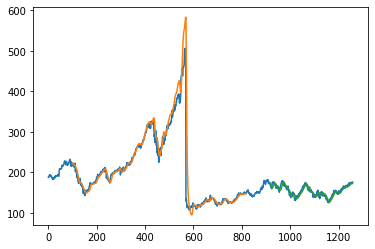

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

441

In [ ]:
#predicting next 30 days data

In [43]:
x_input=test_data[341:].reshape(1,-1) # for caluculating next day we need previous 100 days data 
x_input.shape

(1, 100)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input

[0.04889167188478394,
 0.045535378835316165,
 0.05705698184095176,
 0.05838447088290544,
 0.05983719474013771,
 0.06675015654351907,
 0.0665497808390732,
 0.0699311208515967,
 0.0728866624921728,
 0.07105823418910456,
 0.07120851596743893,
 0.07772072636192856,
 0.08583594239198494,
 0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.1043456480901

In [47]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16429389]
101
1 day input [0.04553538 0.05705698 0.05838447 0.05983719 0.06675016 0.06654978
 0.06993112 0.07288666 0.07105823 0.07120852 0.07772073 0.08583594
 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088
 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171
 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512
 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292
 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021
 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173
 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963
 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267
 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081

8 day output [[0.1598804]]
9 day input [0.07105823 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446
 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654
 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244
 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555
 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567
 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046
 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617
 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158
 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511
 0.14256731 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577
 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323
 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969
 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0

17 day output [[0.1527813]]
18 day input [0.09380088 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953
 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272
 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224
 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568
 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986
 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446
 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074
 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419
 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504
 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.16429389 0.16413294
 0.16381016 0.1633364

26 day output [[0.14581987]]
27 day input [0.11774577 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555
 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567
 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046
 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617
 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158
 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511
 0.14256731 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577
 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323
 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969
 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566
 0.17179712 0.16429389 0.16413294 0.16381016 0.16333646 0.16275075
 0.16208999 0.16138086 0.16064079 0.1598804  0.15910634 0.15832306
 0.15753374 0.1567408

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
len(df1)

1259

In [50]:
df3=df1.tolist()
df3.extend(lst_output)

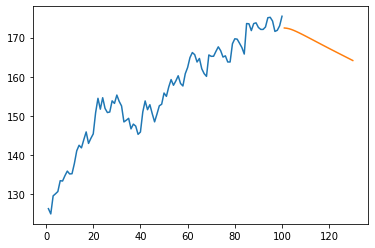

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

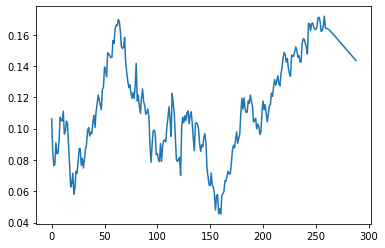

In [53]:
plt.plot(df3[1000:])